In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# Load and prepare for data cifar10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 64

trainset = datasets.CIFAR10(root='../data/cifar10', train=True, transform=transform, download=True)
testset = datasets.CIFAR10(root='../data/cifar10', train=False, transform=transform, download=True)

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

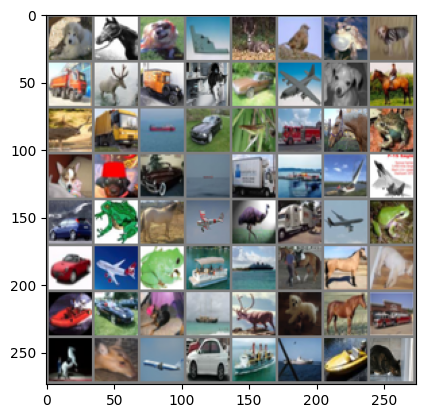

dog horse dog plane deer bird frog dog truck deer truck cat car plane dog horse deer truck ship car bird truck horse frog dog dog car ship truck plane ship plane car frog horse plane bird truck plane frog car plane frog ship ship horse horse dog ship car dog ship deer dog horse truck horse deer plane car ship ship ship cat


In [21]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img * 0.5 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[i]] for i in range(len(labels))))

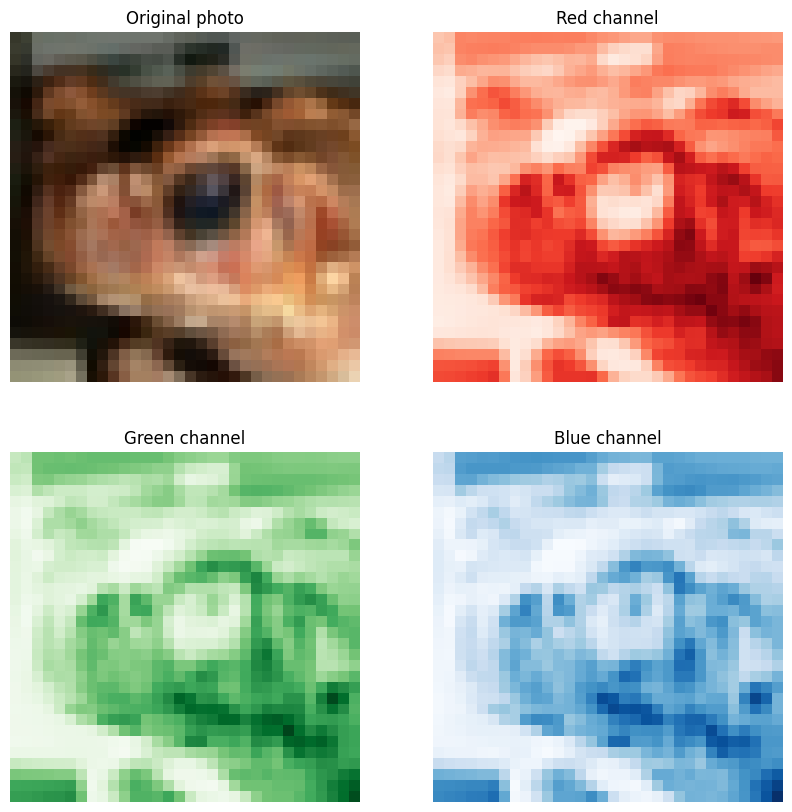

f r o g


In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Choose one image
images[0] = images[0] * 0.5 + 0.5
npimg = images[0].numpy()

# Separating the color channels
red_channel = npimg[0, :, :]
green_channel = npimg[1, :, :]
blue_channel = npimg[2, :, :]

# Create a 10x10 inch figure
plt.figure(figsize=(10, 10))

# Original photo
plt.subplot(2, 2, 1)
plt.imshow(np.transpose(npimg, (1, 2, 0))) # (C, H, W) -> (H, W, C)
plt.title("Original photo")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(red_channel, cmap="Reds")
plt.title("Red channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(green_channel, cmap="Greens")
plt.title("Green channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(blue_channel, cmap="Blues")
plt.title("Blue channel")
plt.axis("off")

plt.show()
print(' '.join(classes[labels[0]]))

In [34]:
# Building a model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc = nn.Linear(64 * 8 * 8, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

In [59]:
# Initialization
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [60]:
# Train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
losses = []

for epoch in range(10):  # 10 epochs
    model.train()
    running_loss = 0.0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    avg_loss = running_loss / len(trainloader)
    losses.append(avg_loss)

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")


Epoch 1, Loss: 1.3614
Epoch 2, Loss: 0.9894
Epoch 3, Loss: 0.8604
Epoch 4, Loss: 0.7757
Epoch 5, Loss: 0.7119
Epoch 6, Loss: 0.6600
Epoch 7, Loss: 0.6167
Epoch 8, Loss: 0.5729
Epoch 9, Loss: 0.5376
Epoch 10, Loss: 0.5040


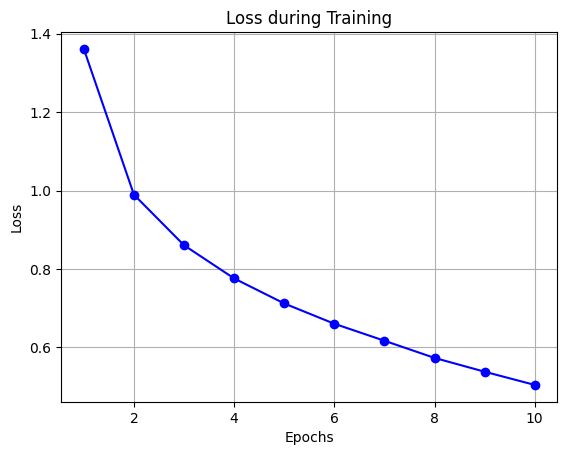

In [61]:
# Draw the trend of loss
plt.plot(range(1, 11), losses, marker='o', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss during Training')
plt.grid(True)
plt.show()

In [62]:
# Evaluate
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test data: {100 * correct / total:.2f}%")

Accuracy on test data: 70.76%
